## Gradient descent: Linear Regression

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt  

### The data： Boston Housing Price Dataset

In [7]:
from sklearn.datasets import load_boston
bdata = load_boston() # using the Boston Housing Prices Data Set
rm = bdata.data[:,5] # Number of Rooms
price = bdata.target # Median PRIC

### Gradient descent with one independent variable
Model Representation: 
$$y_i = \theta_0 + \theta_1 x_i$$
Cost Function:
$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2$$
Gradient Descent
$$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum\limits_{i=1}^m (h_\theta(x_i) - y_i)$$
$$\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum\limits_{i=1}^m (h_\theta(x_i) - y_i)x$$

In [10]:
import time
"""
Function
--------
bivariate_ols
    Gradient Descent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""

def bivariate_ols(xvalues, yvalues, R=0.0001, MaxIterations=100000):
    t0 = time.time()
    m = xvalues.shape[0] # rows of xvalues
    # hypothesis: y = alpha + beta * x
    alpha = 0 # initial alpha
    beta = 0 # inital beta
    error = np.mean((alpha + beta*xvalues - yvalues)**2) /2 # scalar
    for i in range(MaxIterations):
        alpha_gradient = np.mean(alpha + beta*xvalues - yvalues)
        beta_gradient = np.mean((alpha + beta*xvalues - yvalues)*xvalues) 
        alpha = alpha - R * alpha_gradient # update alpha
        beta = beta- R* beta_gradient # update beta
        new_error = np.mean((alpha + beta*xvalues - yvalues)**2)/2
        if abs(error - new_error) <= 0.0000001: # converge conditions
            print("converged, iterations: %d"%(i))
            break
        else:
            error = new_error
    print("Time taken: %.2f seconds" %(time.time() - t0))
    return alpha, beta

Time taken: 6.37 seconds
alpha = -24.084398, beta = 7.437901
converged, iterations: 40832
Time taken: 2.70 seconds
alpha = -34.410855, beta = 9.061272


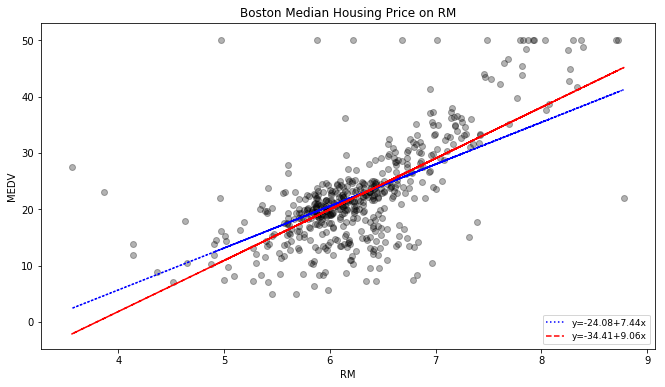

In [15]:
X = bdata.data[:,5:6] # RM
Y = bdata.target.reshape(-1,1) # reshape Y to n by 1 array

fig = plt.figure(figsize=(11,6))
for eta, col, line in zip([0.001, 0.01], ["blue", "red"], [":", "--"]):
    alpha, beta = bivariate_ols(X, Y, eta)
    print("alpha = %f, beta = %f"%(alpha, beta))
    plt.plot(X, alpha+beta*X, color=col, linestyle=line, label="y=%.2f+%.2fx"%(alpha,beta))
plt.scatter(X,Y, color="black", alpha=0.3)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Boston Median Housing Price on RM")
plt.legend(loc="lower right", prop={"size":9})
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, Y)
print("alpha = %f, beta = %f"%(lr.intercept_, lr.coef_))

alpha = -34.670621, beta = 9.102109


### Gradient descent with multiple variables
Model Representation: 
$$h_\theta(x) = \begin{bmatrix}\theta_0 & \theta_1 &\cdots &\theta_n \end{bmatrix}\begin{bmatrix}x_0\\x_1\\ \vdots\\x_n\end{bmatrix} = \theta^Tx$$
* We assume $x_0^{(i)}=1$ for $i\in(1,2,...,m)$

Gradient Descent:
$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum\limits_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$
* $\alpha$ is the learning rate

In [42]:
"""
Function
--------
multivariate_ols
    Gradient Descent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
Returns
-------
theta: ndarrays
    parameters
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.0001, MaxIterations=100000):
    m = xvalue_matrix.shape[0] # number of rows of X
    n = xvalue_matrix.shape[1] # number of columns of X
    X_b = np.c_[np.ones((m,1)),xvalue_matrix]
    theta = np.random.randn(n+1,1)

    pred = X_b.dot(theta)
    error = np.mean((pred-yvalues)**2)/2
    
    for i in range(1,MaxIterations):
        gradient = 2/m * X_b.T.dot(pred - yvalues)
        theta = theta - R * gradient
        pred = X_b.dot(theta)
        new_error = np.mean((pred-yvalues)**2)/2
        if abs(error-new_error) <= 0.0001:
            print("Converged, iterations:%d"%(i))
            break
        else:
            error = new_error
    return theta


In [39]:
def standardize(raw_data):
    return (raw_data - np.mean(raw_data, axis=0))/np.std(raw_data, axis=0)

In [40]:
X = bdata.data[:,[0,5]] # RM and CRIM
Y = bdata.target.reshape(len(bdata.target),1)

for r in [0.001,0.01, 0.1]:
    theta = multivariate_ols(standardize(X), Y, r) # use standardized features
    print("R={0}\n".format(r), theta)

Converged, iterations:2317
R=0.001
 [[ 22.31527438]
 [ -2.28291985]
 [  5.84343095]]
Converged, iterations:288
R=0.01
 [[ 22.46456666]
 [ -2.25622633]
 [  5.88092758]]
Converged, iterations:33
R=0.1
 [[ 22.51706924]
 [ -2.25422232]
 [  5.8881368 ]]


In [41]:
m_lr = LinearRegression()
m_lr.fit(standardize(X), Y)
print("alpha = {0}, beta = {1}".format(m_lr.intercept_, m_lr.coef_))

alpha = [ 22.53280632], beta = [[-2.24860926  5.89441657]]


### Normal Equation for Multivariate Linear Regression
$$\theta = (X^TX)^{-1}X^Ty$$

In [43]:
import numpy.linalg as la
X = bdata.data[:, [0,5]]
X = standardize(X)
X = np.insert(X,0,1,axis=1)
Y = bdata.target.reshape(-1,1)
tran_X = np.transpose(X)
theta = np.dot(np.dot(la.inv(np.dot(tran_X, X)),tran_X),Y)
theta

array([[ 22.53280632],
       [ -2.24860926],
       [  5.89441657]])

### Regularized Linear Regression

Cost Function:
$$\frac{1}{2m} \sum\limits_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2 + {\lambda}\sum\limits_{j=1}^n{{\theta}_j^2}$$

* The $\lambda$ is the regularization parameter. It determines how much the costs of our $\theta$ parameters are inflated

Gradient Descent:
$$\theta_0 := \theta_0 - \frac{\alpha}{m}\sum\limits_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_0^{(i)}$$
$$\theta_j := \theta_j(1-\alpha{\frac{\lambda}{m}}) - \frac{\alpha}{m}\sum\limits_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)} $$

* $1−\alpha\frac{\lambda}{m}$ will always be less than 1. Intuitively it reduces the value of $\theta$ by some amount on every update. 

In [71]:
"""
Function 
----------
multivariate_ols_ridge
     Gradient Descent algorithm that includes a ridge regularizationto penalize excessive complexity.

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
_lambda: float
    Penalty term
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""

def multivariate_ols_ridge(xvalue_matrix, yvalues, _lambda = 100, R=0.01,  MaxIterations=100000):
    m = xvalue_matrix.shape[0]
    n = xvalue_matrix.shape[1]
    alpha = np.random.randn(1)
    beta_array = np.zeros((n,1)) 
    pred = alpha + xvalue_matrix.dot(beta_array) # prediction
    error = np.mean((pred-yvalues)**2)/2
    
    for i in range(MaxIterations):
        alpha_gradient = np.sum(pred-yvalues)/m
        beta_gradient = (pred - yvalues).T.dot(xvalue_matrix)/m
        alpha = alpha - R*alpha_gradient # update alpha in the same way 
        beta_array = beta_array*(1-_lambda*R/m) - np.transpose(R*beta_gradient) # update beta with penalty term
        pred = alpha + np.dot(xvalue_matrix, beta_array) 
        new_error = np.mean((pred-yvalues)**2)/2
        if abs(new_error - error)<0.0001:
            break
        else:
            error = new_error
    return(alpha, beta_array)

In [86]:
X = bdata.data # RM and CRIM
Y = bdata.target.reshape(len(bdata.target),1)
multivariate_ols_ridge(standardize(X), Y, _lambda=200)

(array([ 22.50130106]), array([[-0.5799784 ],
        [ 0.47658795],
        [-0.46756508],
        [ 0.70995445],
        [-0.63932182],
        [ 2.5857054 ],
        [-0.21451506],
        [-1.14135875],
        [ 0.30619837],
        [-0.48337948],
        [-1.4746112 ],
        [ 0.7105449 ],
        [-2.53928472]]))